In [1]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2 * np.pi * x) + np.random.rand(100,1)

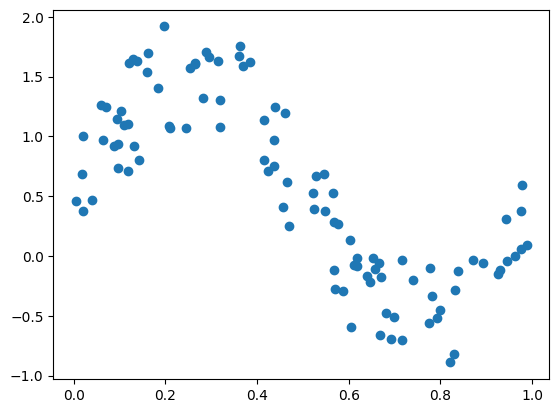

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x , y)

In [4]:
from pathlib import Path
import sys
import os
import numpy as np

Path().resolve()
sys.path.append(os.path.join(Path().resolve(), '..'))
from dezero import Variable
import dezero.functions as F


In [4]:


I, H , O = 1, 10, 1

W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data

    if i % 1000 == 0:
        print(loss)





variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.2475948546674987)
variable(0.23786120447054812)
variable(0.2122223133310291)
variable(0.16742181117834115)
variable(0.09681932619992617)
variable(0.07849528290602327)
variable(0.07749729552991154)
variable(0.07722132399559314)


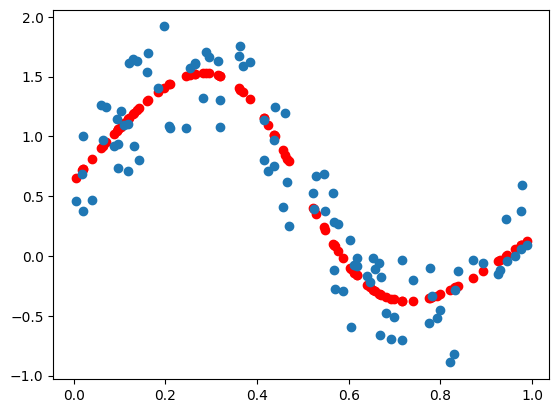

In [13]:
plt.scatter(x, y_pred.reshape(-1).data, color='red')
plt.scatter(x,y)

In [14]:
W1

variable([[-1.92310858 -1.74651425 -9.69055807 -0.94601886 -0.3374755  -1.85279905
           -1.65801259 -1.77645875 -1.54233905 -1.67934998]])

In [17]:
from dezero.core import square, as_array

as_array(W1)

variable([[-1.92310858 -1.74651425 -9.69055807 -0.94601886 -0.3374755  -1.85279905
           -1.65801259 -1.77645875 -1.54233905 -1.67934998]])

In [21]:
np.isscalar((1,2))

False

In [6]:
a = Variable(np.array(1.0))
b = a

In [10]:
b.data, b.grad

(array(1.), 1.0)

In [9]:
b.grad = 1.0

In [12]:
a.grad

1.0

In [13]:
id(a)

140348056313616

In [14]:
id(b)

140348056313616

In [18]:
a = [1,2]
b = a
print(id(a))
print(id(b))

a = [3,4]
print(id(a))
print(id(b))

140348056294336
140348056294336
140348056290496
140348056294336


In [16]:
b = a